# CSCI 3022: Intro to Data Science - Fall 2017 Practicum 
***


This practicum is due on Moodle by **11:59pm on Wednesday December 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
2. You may **NOT** post to message boards or other online resources asking for help. 
3. You may **NOT** collaborate with classmates or anyone else.  

Violation of the above rules will result in an **F** in the course and a trip to Honor Council. 

***

**By writing your name below you agree to abide by the rules given above:**

**Name**: Sam Cuthbertson

**Section**: 001
***


**NOTES**: 

- You may not use late days on the practicum nor can you drop your practicum grade. 
- If you have a question for Chris and Dan, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class we will make the post public (and anonymous). 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [862]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import scipy.misc as misc
import matplotlib.lines as mlines

### [40 points] Problem 1: Parking Problems 
***

Imagine that there are 50 parking spots on a street. A store is located at position 0, and each parking space along the street is numbered according to its distance from the store, so that the space right in front of the store is spot 0, the next is spot 1, and so on up until the end of the block, which is spot 49.

**Prof. Ketelsen is direct and systematic**. He enters the street and drives all the way to the store, which takes him 90 seconds. Then, he drives incrementally away from the store, taking 2 seconds for each parking spot that he checks. He parks in the first empty spot (after he checks it) and then walks to the store from there, covering ground at a rate of 5 seconds per parking spot. If Chris parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he makes it to the end of the road with not a single parking spot to be found, he parks in his secret spot, which is always free, but far away, which takes him an additional 5 minutes beyond the time he already spent using his parking strategy.

**Prof. Larremore is strategic and prone to overthinking**. He enters the street at the end, position 49, and starts driving toward the store, but checks each spot that he passes, taking 2 second to check each. But, in an attempt to be clever, he doesn’t park in the first spot he sees, because what if there’s a closer spot? Instead, he passes n empty spots and then parks in the next empty spot he sees (after he checks it). From where he parks on the street, he walks to the store at a speed of 5 seconds per parking spot. Just like Chris, if Dan parks in spot 0, he doesn’t need to walk at all, but he’d still have to check to see if the spot was taken. If he gets all the way to the store without parking, he parks in his own secret spot, which is always free, but not really close, which takes him an additional 3 minutes beyond the time he already spent using his parking strategy.

**Part A**: Write a function **chris_park_time**$(\hspace{.5mm}p)$ that performs a single trial and returns the total time, in seconds, for Chris to get to the store, given the probability that each spot is occupied by a car already, $p$. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [863]:
def chris_park_time(p):
    time = 90 # Driving to the store
    spot = 0  # First spot
    for i in range(50): # Will do 0 - 49
        time += 2       # Two seconds to check spot 
        if(np.random.choice([0, 1], p=[p, 1-p]) == 1): # Spot is free
            return time + spot * 5 # Return how long it took Chris to find spot, plus walking time
        spot += 1 # Increment spot
        
    return time + 300 # Secret spot, nothing was open

**Testing: We'll test our edge cases (p = 0 and p = 1) as well as sampling from p = 0.5 and comparing that with the  values from our first two tests.**

**Expected Values:**  
**From p = 0, we expect 90 + 2 = 92 seconds.**  
**From p = 1, we expect 90 + 2 * 50 + 300 = 490 seconds.**  
**From p = 0.5, we expect something much closer to 92 than to 490. We'll double back to this value in Part G below.**  

In [864]:
print("p = 0:", str(chris_park_time(0)) + "s")
print("p = 1:", str(chris_park_time(1)) + "s")
print("p = 0.5, avg of 50 tests:", str(np.mean([chris_park_time(0.5) for ii in range(50)])) + "s")

p = 0: 92s
p = 1: 490s
p = 0.5, avg of 50 tests: 101.1s


**Looks good!**

**Part B**: Write a function **dan_park_time**$(\hspace{.5mm}p, n)$ that performs a single trial and returns the total time, in seconds, for dan to get to the store, where $n$ is the number of empty spots he passes before taking the next available spot. In addition to showing your code, you should also describe and implement a simple test to convince yourself (and us) that your code is working correctly. 

In [865]:
def dan_park_time(p, n):
    time = 0 # Driving to the store
    spot = 49  # First spot
    m = 0 # rejected spots
    for i in range(50): # Will do 0 - 49
        time += 2       # Two seconds to check spot 
        if(np.random.choice([0, 1], p=[p, 1-p]) == 1): # Spot is free
            if(n != m):
                m += 1
            else:
                return time + spot * 5 # Return how long it took Dan to find spot, plus walking time
        
        spot -= 1 # Increment spot
        
    return time + 180 # Secret spot, nothing was open

**Testing: We'll test our edge cases (p = 0, 1 and n = 0, 50) as well as sampling from p = 0.5 with n = 25 and comparing that with the  values from our first tests.**

**Expected Values:**  
**From p = 0, n = 0, we expect 49 * 5 + 2 = 247 seconds.**  
**From p = 1, n = 0  we expect 50 * 2 + 180 = 280 seconds.**  
**From p = 1, n = 50  we expect 50 * 2 + 180 = 280 seconds.**  
**From p = 0, n = 50  we expect 50 * 2 + 180 = 280 seconds.**  
**From p = 0.5, n = 25, we expect something much larger than any of the above options. We'll double back to this in Part H below.** 

In [767]:
print("p = 0, n = 0:", str(dan_park_time(0, 0)) + "s")
print("p = 1, n = 0:", str(dan_park_time(1, 0)) + "s")
print("p = 1, n = 50:", str(dan_park_time(1, 50)) + "s")
print("p = 0, n = 50:", str(dan_park_time(0, 50)) + "s")
print("p = 0.5, n = 25 avg of 50 tests:", str(np.mean([dan_park_time(0.5, 25) for ii in range(50)])) + "s")

p = 0, n = 0: 247s
p = 1, n = 0: 280s
p = 1, n = 50: 280s
p = 0, n = 50: 280s
p = 0.5, n = 25 avg of 50 tests: 223.9s


**Looks good!**

**Part C**: Run simulations to evaluate their parking strategies on a sleepy Tuesday morning when the probability of a parking space being occupied is $p=0.6$.  Perform $1000$ trials each for Chris's strategy and Dan's strategy with parameters $n=1,2,$ and $3$. Plot 4 histograms, one on top of the other, for the resulting parking times with bin boundaries at $[0, 10, 20, \ldots, 300]$.  Be sure to label all axes and provide meaningful titles for each histogram.  Based on your histograms, which of the four strategies appears to be the best? 

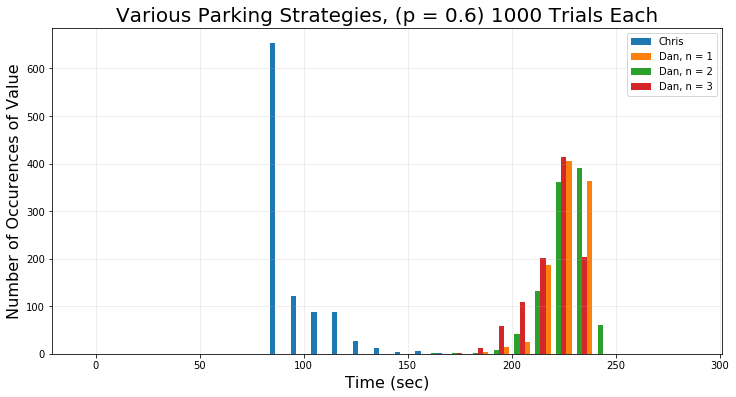

In [768]:
def plot_hist(p):
    chris = [chris_park_time(p) for ii in range(1000)]
    dan_1 = [dan_park_time(p, 1) for ii in range(1000)]
    dan_2 = [dan_park_time(p, 2) for ii in range(1000)]
    dan_3 = [dan_park_time(p, 3) for ii in range(1000)]

    fix, ax = plt.subplots(figsize=(12,6))
    ax.grid(True, alpha=0.25)
    plt.ylabel('Number of Occurences of Value',fontsize=16)
    plt.xlabel('Time (sec)',fontsize=16)
    plt.title('Various Parking Strategies, (p = ' + str(p) + ') 1000 Trials Each', fontsize = 20)
    ch, bin_edges = np.histogram(chris, bins = range(0, 300, 10))
    chris1 = plt.bar(bin_edges[:-1] - 5, ch, width = 2.5, label = "Chris")

    d1, bin_edges = np.histogram(dan_1, bins = range(0, 300, 10))
    dan1 = plt.bar(bin_edges[:-1] - 2.5 , d1, width = 2.5, label = "Dan, n = 1")

    d2, bin_edges = np.histogram(dan_2, bins = range(0, 300, 10))
    dan2 = plt.bar(bin_edges[:-1] + 2.5 , d2, width = 2.5, label = "Dan, n = 2")

    d3, bin_edges = np.histogram(dan_3, bins = range(0, 300, 10))
    dan3 = plt.bar(bin_edges[:-1] + 5, d3, width = 2.5, label = "Dan, n = 3")

    plt.legend(handles=[chris1, dan1, dan2, dan3])

    plt.show()
    
plot_hist(0.6)

**Looking at this histogram, Chris's strategy is a clear winner. None of Dan's even come close.**

**Part D**: Run simulations with at least $1000$ trials and plot estimates of the expected parking time on a single graph for Chris's strategy and Dan's strategy with parameters $p=0.6$ and $n=0, 1, \ldots, 25$. Report the optimal parameter $n$ for Dan's strategy and use your plot to decide whose strategy is better. 

Optimal N for Dan: 7 with an average of 277.438 seconds.


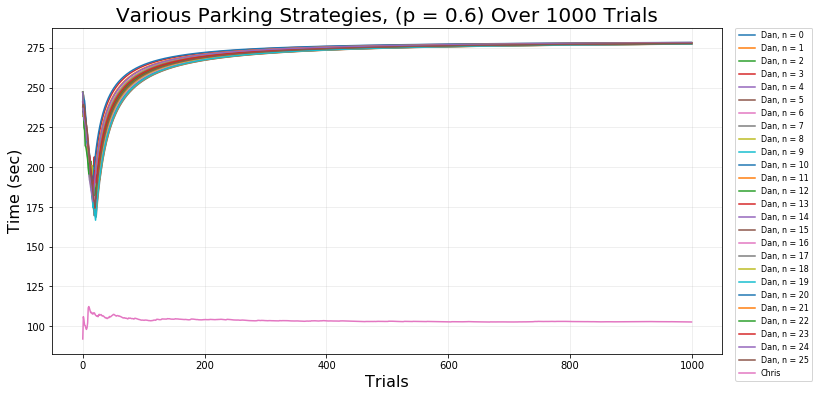

In [769]:
def plot_graph(p):
    chris = [chris_park_time(p) for ii in range(1000)]
    dan = [[0 for x in range(1000)] for y in range(26)] 
    for ii in range(26):
        dan[ii] = [dan_park_time(p, ii) for ii in range(1000)]
        
    echris = np.zeros(len(chris))
    for ii in range(len(echris)):
        echris[ii] = np.sum(chris[:ii+1]) / len(chris[:ii+1])
        
    edan = [[0 for x in range(1000)] for y in range(26)]
    optimalN = [0, 500]
    for ii in range(26):
        for jj in range(len(edan[ii])):
            edan[ii][jj] = np.sum(dan[ii][:jj+1]) / len(dan[ii][:jj+1])
        if(edan[ii][999] < optimalN[1]):
            optimalN = [ii, edan[ii][999]]

    print("Optimal N for Dan: " + str(optimalN[0]) + " with an average of " + str(optimalN[1]) + " seconds.")
            
    fix, ax = plt.subplots(figsize=(12,6))
    ax.grid(True, alpha=0.25)
    plt.ylabel('Time (sec)',fontsize=16)
    plt.xlabel('Trials',fontsize=16)
    plt.title('Various Parking Strategies, (p = ' + str(p) + ') Over 1000 Trials', fontsize = 20)

    plots = []
    for ii in range(26):
        plots += plt.plot(edan[ii], label = "Dan, n = " + str(ii)) 

    plots += plt.plot(echris, label = "Chris")
    
    plt.legend(handles = plots, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize = 8)
        
    plt.show()
    
plot_graph(0.6)

**Just like the histogram above, it appears that Chris's strategy is better than Dan's for any n where 0 < n < 25. **  
**However, as all of Dan's stratagies are so close, I would take the reported 'Optimal N for Dan' above with a huge grain of salt.**

**Part E**: Repeat **Part C** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

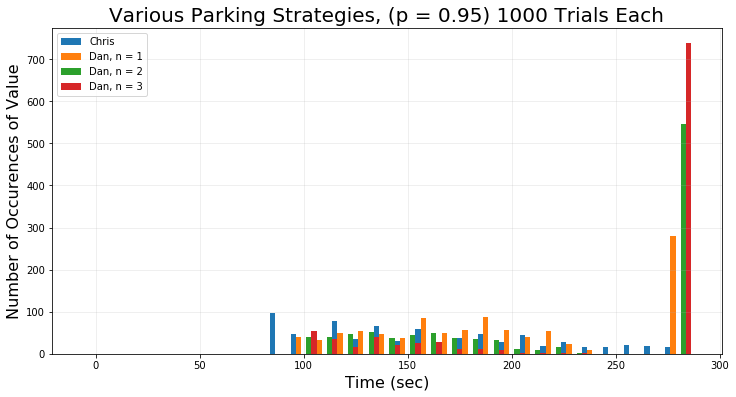

In [770]:
plot_hist(0.95)

**This histogram shows how the stratagies have gotten closer. Chris's still appears to have a lower average, but there is some overlap.**

**Part F**: Repeat **Part D** for a busier shopping time when the probability of any space being occupied is $p = 0.95$.

Optimal N for Dan: 18 with an average of 279.481 seconds.


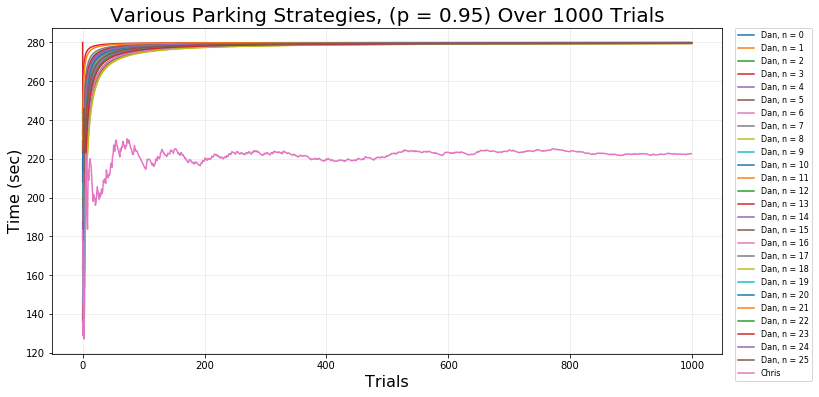

In [771]:
plot_graph(0.95)

**Part G**: Analytically determine a formula for Chris's expected parking time as a function of the parameter $p$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

**I'm going to get ahead of myself here and build on work done in part H determining Dan's formula, so go ahead and read that first.**  

**Chris's stratagy can be viewed as the same as Dan's strategy, except with an initial up front cost of 90 and n set to a fixed 0. Additionally, he starts at spot k = 0 and proceeds to spot 49, exactly the opposite of Dan. All of this, however, can be solved with simple manipulations of Dan's forumla:**

\begin{align*}
E[Chris(p)] &= \sum\limits_{k=1}^{50}2k{k\choose 1} (p)^{k-1} (1-p)^{k-p-1} + \sum\limits_{k=2}^{50}5(k-1){50 - k\choose 1} (p)^{k-1} (1-p)^{k-p-1} + 300 * \Bigg(1 - \Big(\sum\limits_{k=1}^{50}{k\choose 1} (p)^{k-1} (1-p)^{k-p-1}\Big)\Bigg)
\end{align*}

**Or in python:**

In [914]:
def chris_true_time(p):
    time = 90 # Initial cost
    spot_found = 0 # Probability a spot has been found
    for i in range(1, 51): # Will iterate 1 - 50
        bino = round(stats.nbinom.pmf(i - 1, 1, (1-p)), 16)
        time += 2*i*bino
        spot_found += bino
    
    for i in range(2, 50): # Will iterate 2 - 50
        bino = round(stats.nbinom.pmf(i - 1, 1, (1-p)), 16)
        time += 5*(i-1)*bino
    
    time += 300 * (1 - spot_found)
    
    return time

**Let's check our results from simulation, by using a confidence interval from our simulation result overlaid on this 'true' formula:**

In [906]:
def CI(alpha, data):  
    xbar = np.mean(data)
    std = np.std(data)
    zao2 = stats.norm.ppf(1 - (alpha/2))
    deltax = zao2 * std / np.sqrt(len(data))
    return [xbar - deltax, xbar + deltax]

In [907]:
#chris = [chris_park_time(p) for ii in range(1000)]
#print(CI(0.05, chris), chris_true_time(p))

[153.82704832126558, 162.23095167873441] 154.267018637


**Part H**: Analytically determine a formula for Dan's expected parking time as a function of parameters $p$ and $n$.  Verify that your exact result agrees well with your simulated results from **Parts D** and **F**.

**Dan starts out with an initial cost of 0:**

**The probability of Dan parking in spot k is best described by the negative binomial, where n is the number of 'failures' accepted (open spots passed):**
$$
\begin{align*}
P(X = k) &= {k\choose n} (p)^{k-1} (1-p)^{k-p-1}
\end{align*}
$$

**Expected parking time then can be described as a combination of the following:**

$$
\begin{align*}
E[Checking] &= \sum\limits_{k=1}^{50}2k{k\choose n} (p)^{k-1} (1-p)^{k-p-1} \\
E[Walking] &= \sum\limits_{k=50}^{2}5(k-1){50 - k\choose n} (p)^{k-1} (1-p)^{k-p-1} \\
E[SecretSpot] &= 280 * \Bigg(1 - \Big(\sum\limits_{k=1}^{50}{k\choose n} (p)^{k-1} (1-p)^{k-p-1}\Big)\Bigg)
\end{align*}
$$
**Putting it all together, we see:**  

$$
\begin{align*}
E[Dan(n,p)] &= \sum\limits_{k=1}^{50}2k{k\choose n} (p)^{k-1} (1-p)^{k-p-1} + \sum\limits_{k=50}^{2}5(k-1){50 - k\choose n} (p)^{k-1} (1-p)^{k-p-1} + 280 * \Bigg(1 - \Big(\sum\limits_{k=1}^{50}{k\choose n} (p)^{k-1} (1-p)^{k-p-1}\Big)\Bigg)
\end{align*}
$$

**Or in python:**

In [912]:
def dan_true_time(p, n):
    avg = 0
    spot_found = 0
    for i in range(1, 51):
        bino = round(stats.nbinom.pmf(i - n - 1, n + 1, (1-p)), 16)
        avg += 2*i*bino
        spot_found += bino
    
    for i in range(51, 1, -1):
        bino = round(stats.nbinom.pmf(50 - i - n - 1, n + 1, (1-p)), 16)
        avg += 5*(i-1)*bino
        
    avg += 280 * (1 - spot_found)
    
    return avg

p = 0.6
n = 25
chris = [dan_park_time(p, n) for ii in range(500)]
xbar = np.mean(chris)
std = np.std(chris)
zao2 = stats.norm.ppf(0.95)
deltax = zao2 * std / np.sqrt(len(chris))
CI = [xbar - deltax, xbar + deltax]

print(CI, dan_true_time(p, n))

[268.22618715278418, 273.85781284721577] 269.913144685


**Part I**: Use the formulas you found in **Parts G** and **H** to make an argument about whose strategy is better — and, if the answer is it depends, explain which values of $p$ and/or $n$ allow Chris to get to the store faster than Dan. Provide any graphical summaries necessary to justify your conclusion. 

**Note**: While we hope that you come up with correct analytic formulas in **Parts G** and **H**, you may feel free to use the code written above to do this analysis using simulation estimates. 

**Let's try graphing a whole bunch of stuff and see if things make more sense:**

### [30 points] Problem 2: Gender Balance in Movements Between Academic Disciplines
***

Every year, the online academic resume service, ORCID, dumps the data from all of the professors who have their privacy settings set to “public” so that the research community can learn about the makeup of the academic workforce. In this real-data problem, we’re going to study the flows of professors between different academic fields to learn about gender differences. We’ll use a pre-processed dataset used by actual researchers studying gender imbalance across fields.

First, some information about the data. For each of the 1.6 million professors in the public ORCID data dump, the researchers determined (a) what field they are currently in, (b) what field they did their PhD in, and (c) their gender. Here, because the goal of the study was originally to learn about disparities between men and women, gender was coded by the researchers as male or female, as indicated by the professors. Those who chose not to mark their gender as public were not included in the processed dataset.

The researchers have provided CSCI 3022 with two files: **totals.csv** and **switch_edgelist.csv**. The first file enumerates the total numbers of men and women in each of $30$ different fields. The second file enumerates the total numbers of men and women who switched from one field to another field during their career.

The null hypothesis about the data is that the gender balance of people leaving field $X$ is the same as the gender balance in field $X$. For example, if Anthropology is $50\%$ women and $50\%$ men, we expect people who have moved from Anthropology to another field to reflect this $50/50$ balance. On the other hand, if Physics is only $15\%$ women and $85\%$ men, we expect people who have moved from Physics to another field to reflect a $15/85$ balance.

In symbolic form, we might write this as follows. Let the proportion of professors in field i who are women be given by $p_i$, and let the proportion of women who move from field i to some other field be given by $q_i$. Then the expected result is that $p_i$ = $q_i$. The researchers are interested to know if there is statistical evidence that $p_i \neq q_i$ for any of the fields $i$.

**Part A**: Wrangle those data files. Then, make a plot of $p_i$ for all $i = 1, 2, \ldots, 30$ fields using a green color, and on the same axes, plot $q_i$ using a blue color.

In [849]:
# Read in the files
dfTotals = pd.read_csv("data/totals.csv")
dfSwitch = pd.read_csv("data/switch_edgelist.csv")

dfTotals = dfTotals.drop(['idx'], axis = 1)
dfSwitch = dfSwitch.drop(['idx', 'to'], axis = 1)

# Sort by gender, merge back by field
dfMal = dfTotals.loc[dfTotals['gend_cat'] == 'male']
dfFem = dfTotals.loc[dfTotals['gend_cat'] == 'female']
dfCom = pd.merge(dfMal, dfFem, on = ['field'], suffixes = ['_male', '_female'])

dfCom = dfCom.drop(['gend_cat_male', 'gend_cat_female'], axis = 1)

# Sum up all the destinations
dfSwi = dfSwitch.reset_index().groupby(["from", 'gend_cat']).sum()
dfSwi = dfSwi.reset_index()

# Sort by gender, merge back by field then merge with totals on field/to
dfMale = dfSwi.loc[dfSwi['gend_cat'] == 'male']
dfFeme = dfSwi.loc[dfSwi['gend_cat'] == 'female']
dfCome = pd.merge(dfMale, dfFeme, on = ['from'], suffixes = ['_male', '_female'])

dfCom = pd.merge(dfCom, dfCome, left_on = ['field'], right_on = ["from"], suffixes = ['_in', '_leaving'])

dfCom = dfCom.drop(['gend_cat_male', 'gend_cat_female', 'index_male', 'from', 'index_female'], axis = 1)

dfCom['N_in'] = (dfCom['N_male_in'] + dfCom['N_female_in'])
dfCom['N_leaving'] = (dfCom['N_male_leaving'] + dfCom['N_female_leaving'])

# Now this is easy!
p = dfCom['N_female_in'] / dfCom['N_in']
q = dfCom['N_female_leaving'] / dfCom['N_leaving']
nump = dfCom['N_in']
numq = dfCom['N_leaving']

dfCom.head(3)

,field,N_male_in,N_female_in,N_male_leaving,N_female_leaving,N_in,N_leaving
0,biochemistry,4669,2179,1016,433,6848,1449
1,communications,3195,2010,750,368,5205,1118
2,philosophy,2399,1149,463,225,3548,688


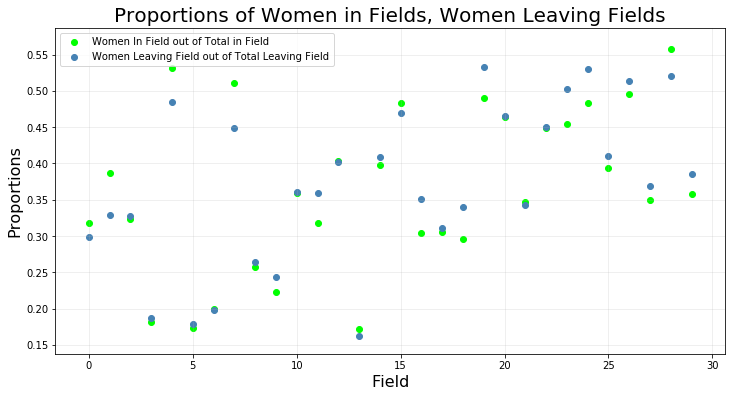

In [859]:
fix, ax = plt.subplots(figsize=(12,6))
ax.grid(True, alpha=0.25)
plt.ylabel('Proportions',fontsize=16)
plt.xlabel('Field',fontsize=16)
plt.title('Proportions of Women in Fields, Women Leaving Fields', fontsize = 20)

win = plt.scatter(range(0, 30), p, label = "Women In Field out of Total in Field", color = 'lime')
wle = plt.scatter(range(0, 30), q, label = "Women Leaving Field out of Total Leaving Field", color = 'steelblue')

plt.legend(handles=[win, wle])

plt.show()

**Part B**: At the $\alpha = 0.05$ significance level, use the method of your choice to determine whether there is sufficient evidence that $p_i \neq q_i$. Be sure to explain why you are justified in using the method that you used, and report the numbers that helped you make your decision for each of the fields. Please use only methods we have discussed in class. Then, replicate your plot from **Part A** and add a red symbol to those fields, if any, where $p_i$ and $q_i$ are statistically different at the given significance level. Comment on any significant findings.  

**We can generate a $100(1 - \alpha)\%$ confidence interval for each $p_i$, and a $100(1 - \alpha)\%$ confidence interval for each $q_i$. If there is no overlap between the two, then $p_i \neq q_i$ at the specified confidence level $\alpha$. **  
**For generating the pertinent confidence intervals, we can use the method described in Lecture 14:**  

$$
\begin{align*}
    CI_i &= \hat{p} \pm z_{\alpha / 2} \sqrt{\frac{p_i (1-p_i )}{n_i}}
\end{align*}
$$

In [860]:
def genpCIs(alpha):
    zao2 = stats.norm.ppf(1 - alpha/2)
    
    CIs = [[0, 0] for x in range(30)]
    for i in range(30):
        phat = p[i] # Generated above
        ni = nump[i] # Generated above
        
        diff = zao2 * np.sqrt((phat * (1 - phat)) / ni)
        
        CIs[i] = [phat - diff, phat + diff]
        
    return CIs

def genqCIs(alpha):
    zao2 = stats.norm.ppf(1 - alpha/2)
    
    CIs = [[0, 0] for x in range(30)]
    for i in range(30):
        qhat = q[i] # Generated above
        ni = numq[i] # Generated above
        
        diff = zao2 * np.sqrt((qhat * (1 - qhat)) / ni)
        
        CIs[i] = [qhat - diff, qhat + diff]
        
    return CIs

biochemistry: 	 CI from 0.307163 to 0.329227 with q of 0.298827
communicatio: 	 CI from 0.372940 to 0.399394 with q of 0.329159 OUT, P != Q
  philosophy: 	 CI from 0.308447 to 0.339242 with q of 0.327035
 engineering: 	 CI from 0.177711 to 0.183964 with q of 0.187160
  psychology: 	 CI from 0.523921 to 0.539688 with q of 0.484111 OUT, P != Q
     physics: 	 CI from 0.169065 to 0.177663 with q of 0.178734
   astronomy: 	 CI from 0.187526 to 0.212576 with q of 0.197917
   education: 	 CI from 0.501591 to 0.519469 with q of 0.449158 OUT, P != Q
   chemistry: 	 CI from 0.252194 to 0.263353 with q of 0.263479
 mathematics: 	 CI from 0.216357 to 0.229538 with q of 0.243660
molecular bi: 	 CI from 0.339858 to 0.378613 with q of 0.360082
   economics: 	 CI from 0.308863 to 0.326552 with q of 0.359719 OUT, P != Q
neuroscience: 	 CI from 0.385343 to 0.420976 with q of 0.402299
computer sci: 	 CI from 0.165624 to 0.177669 with q of 0.162140
     history: 	 CI from 0.383996 to 0.410836 with q of 0

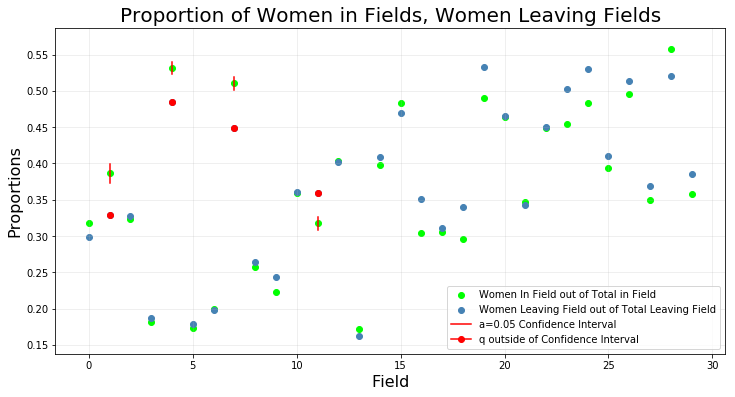

In [861]:
def plot_pq_diff(alpha):
    # Woo confidence interval
    pdiff = p - q
    
    fix, ax = plt.subplots(figsize=(12,6))
    ax.grid(True, alpha=0.25)
    plt.ylabel('Proportions',fontsize=16)
    plt.xlabel('Field',fontsize=16)
    plt.title('Proportion of Women in Fields, Women Leaving Fields', fontsize = 20)

    win = plt.scatter(range(0, 30), p, label = "Women In Field out of Total in Field", color = 'lime')
    wle = plt.scatter(range(0, 30), q, label = "Women Leaving Field out of Total Leaving Field", color = 'steelblue')

    pCIs = genpCIs(alpha)
    qCIs = genqCIs(alpha)
    for index, item in enumerate(pdiff):
        field = dfCom.loc[index, "field"]
        out = ""
        if(pCIs[index][0] > qCIs[index][1] or pCIs[index][1] < qCIs[index][0]):
            out = " OUT, P != Q"
            plt.plot([index, index], [pCIs[index][0], pCIs[index][1]], color = 'red')
            plt.plot(index, q[index], marker = 'o', color = 'red')
            
        print('{:>12.12}'.format(field) + ": \t CI from " + '{:0.6f}'.format(pCIs[index][0]) + " to " + '{:0.6f}'.format(pCIs[index][1])  + " with q of " + '{:0.6f}'.format(q[index]) + out)
        

    red_line = mlines.Line2D([], [], color='red', label='a=' + str(alpha) + ' Confidence Interval')
    red_dots = mlines.Line2D([], [], marker = 'o', color='red', label='q outside of Confidence Interval')

    plt.legend(handles=[win, wle, red_line, red_dots])

    plt.show()
    
plot_pq_diff(0.05)

**Part C**: Repeat the procedure from **Part B** at the $\alpha = 0.01$ level. 

biochemistry: 	 CI from 0.303697 to 0.332693 with q of 0.298827
communicatio: 	 CI from 0.368784 to 0.403550 with q of 0.329159 OUT, P != Q
  philosophy: 	 CI from 0.303609 to 0.344080 with q of 0.327035
 engineering: 	 CI from 0.176729 to 0.184946 with q of 0.187160
  psychology: 	 CI from 0.521444 to 0.542165 with q of 0.484111 OUT, P != Q
     physics: 	 CI from 0.167714 to 0.179014 with q of 0.178734
   astronomy: 	 CI from 0.183591 to 0.216511 with q of 0.197917
   education: 	 CI from 0.498782 to 0.522278 with q of 0.449158 OUT, P != Q
   chemistry: 	 CI from 0.250440 to 0.265107 with q of 0.263479
 mathematics: 	 CI from 0.214286 to 0.231609 with q of 0.243660
molecular bi: 	 CI from 0.333770 to 0.384702 with q of 0.360082
   economics: 	 CI from 0.306084 to 0.329332 with q of 0.359719
neuroscience: 	 CI from 0.379745 to 0.426574 with q of 0.402299
computer sci: 	 CI from 0.163732 to 0.179561 with q of 0.162140
     history: 	 CI from 0.379779 to 0.415053 with q of 0.408768
   s

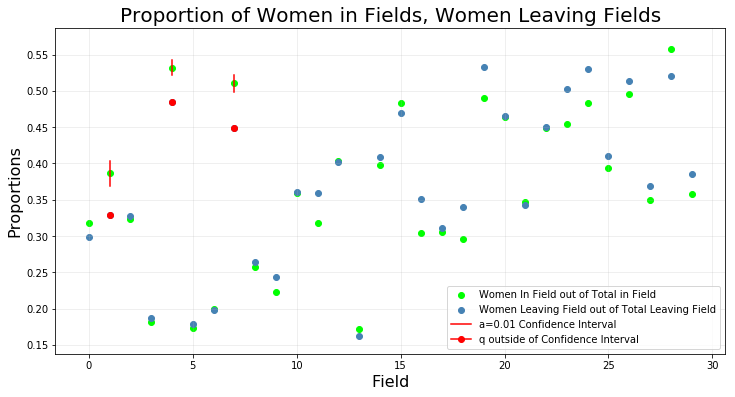

In [858]:
plot_pq_diff(0.01)

### [30 points] Problem 3: Multiple Linear Ralphie-gression 
***

After years of study and professional development, you have finally landed your dream job as Ralphie's data-driven lead handler.  As your first project, you wish to use multiple linear regression to understand and predict what makes Ralphie happy, as measured during halftime of home football games.  Luckily, your predecessor has collected lots of data that might prove relevant.  You'll find this data in the file ralphie.csv. 

**Response**: 

- $\texttt{happiness}$: Ralphie's happiness, measured by a complicated formula involving rate of tail flicks, happy-sounding snorts, and numerous other factors 

**Features**: 

- $\texttt{hay freshness}$: freshness of Ralphie's hay, measured in Freshies 
- $\texttt{coat silkiness}$: silkiness of Ralphie's coat, measured in Larremores 
- $\texttt{run length}$: the length of Ralphie's halftime run, measured in yards 
- $\texttt{temp}$: the outside temperature, measured in degrees Fahrenheit 
- $\texttt{SCMLP}$: the snow-capped majesty of Longs Peak, measured as a fraction between 0 and 1  
- $\texttt{mean GPA}$: mean GPA of Ralphie's handlers 
- $\texttt{score diff}$: the score differential (CU's score minus Opponent' score) at halftime 
- $\texttt{star yards}$: the number of rushing yards by CU's star running back at halftime 
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the concession stand 
- $\texttt{shark attacks}$: the number of shark attacks at the Boulder Res on game day 


**Part A**: Read the data from **ralphie.csv** into a Pandas DataFrame and clean the data.  Note that since we will be doing a multiple linear regression we will need all of the features, so you should drop any row in the DataFrame that is missing data.  

In [753]:
import statsmodels.api as sm 

dfRalphie = pd.read_csv('data/ralphie.csv')
dfRalphie = dfRalphie.dropna()

dfRalphie['hay freshness'] = dfRalphie['hay freshness'].apply(lambda x: float(x[:-1]))
dfRalphie['coat silkiness'] = dfRalphie['coat silkiness'].apply(lambda x: float(x[:-1]))
dfRalphie['temp'] = dfRalphie['temp'].apply(lambda x: float(x[:-1]))

dfRalphie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 96
Data columns (total 11 columns):
happiness         85 non-null float64
hay freshness     85 non-null float64
coat silkiness    85 non-null float64
run length        85 non-null float64
temp              85 non-null float64
SCMLP             85 non-null float64
handler GPA       85 non-null float64
score diff        85 non-null float64
star yards        85 non-null float64
ice cream sold    85 non-null float64
shark attacks     85 non-null float64
dtypes: float64(11)
memory usage: 8.0 KB


/opt/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**Part B**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

In [754]:
def get_model(df, resp_str, feat_strs):
    feat = df[feat_strs]
    feat = sm.add_constant(feat)
    happy = df[resp_str]

    model = sm.OLS(happy, feat).fit()
    return model, feat

feats = (list(dfRalphie.columns.values)[1:])
get_model(dfRalphie, 'happiness', feats)[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     572.2
Date:                Wed, 13 Dec 2017   Prob (F-statistic):           8.10e-66
Time:                        17:47:13   Log-Likelihood:                -249.37
No. Observations:                  85   AIC:                             520.7
Df Residuals:                      74   BIC:                             547.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.2765     13.517     -2.610      0.011     -62.210      -8.343
hay freshness      0.9940      0.113      8.832      0.000       0.770       1.218
coat silkiness     4.0447      0.689      5.868      0.000       2.671       5.418
run length         0.4486      0.037     12.183      0.000       0.375       0.522
temp              -0.9955      0.082    -12.181      0.000      -1.158      -0.833
SCMLP             -2.7631      3.823     -0.723      0.472     -10.380       4.854
handler GPA        0.8343      0.969      0.861      0.392      -1.096       2.765
score diff         5.0875      0.083     61.298      0.000       4.922       5.253
star yards        -0.0108      0.014     -0.749      0.457      -0.040       0.018
ice cream sold     0.0127      0.011      1.121      0.266      -0.010       0.035
shark attacks      0.4050      0.694      0.584      0.561      -0.978       1.788
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.985
Skew:                           0.170   Prob(JB):                        0.611
Kurtosis:                       2.597   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Part C**: Write a function **forward_select**(df, resp_str, maxk) that takes in the DataFrame, the name of the column corresponding to the response, and the max number of desired features, and returns a list of feature names corresponding to the maxk most important features via forward selection.  At each stage in forward selection you should add the feature whose inclusion in the model would result in the lowest sum of squared errors $(SSE)$. Use your function to determine the best $k=5$ features to include in the model. Clearly indicate which feature was added in each stage. 

**Note**: The point of this exercise is to see if you can implement **foward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs forward selection. 

In [755]:
def forward_select(df, resp_str, maxk):
    
    respo = df[resp_str]
    feats =  df.loc[:, df.columns != resp_str]
    
    out_feats = []
    
    for i in range(maxk):
        min_f = 10000000
        best_feat = ""
        for label in feats:
            feat = sm.add_constant(df.loc[:, out_feats + [label]])

            model = sm.OLS(respo, feat).fit()
            sse = np.sum((respo - model.predict(feat))**2)
            
            if(sse < min_f):
                min_f = sse
                best_feat = label
                        
        out_feats.append(best_feat)
        feats = feats.drop([best_feat], axis = 1)
        
        print("Stage " + str(i) + ", added feature '" + best_feat + "' with SSE of " + str(min_f))
        
        
    feat = sm.add_constant(df.loc[:, out_feats])
    model = sm.OLS(respo, feat).fit()
    
    return out_feats

forward_select(dfRalphie, "happiness", 5)

Stage 0, added feature 'score diff' with SSE of 32540.760103536693
Stage 1, added feature 'temp' with SSE of 10876.99555219485
Stage 2, added feature 'run length' with SSE of 5188.844713665114
Stage 3, added feature 'hay freshness' with SSE of 2611.200785412148
Stage 4, added feature 'coat silkiness' with SSE of 1831.899944751533


['score diff', 'temp', 'run length', 'hay freshness', 'coat silkiness']

**Part D**: Write down the multiple linear regression model, including estimated parameters, obtained by your forward selection process. 

**Thanks to model.summary() from above, this is pretty easy:**  

$$
\begin{align*}
    \text{happiness} = -24.7049 + 5.0980(&\text{score diff}) \; - \; 0.9774(\text{temp}) + 0.4595(\text{run length}) \\
    + &1.0001(\text{hay freshness}) + 3.7045(\text{coat silkiness})
\end{align*}
$$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.05$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by forward selection in **Part D**. 

**Let's apply the F-test, as described in Lecture 23. Recall:**

$$
\begin{align*}
    F &= \frac{(SSE_{red} - SSE_{full})/(p-k)}{SSE_{full}/(n - p -1)} \\
    \text{Rejection Region:} \qquad F &\leq F_{\alpha, p - k, n-p-1}
\end{align*}
$$

** Where here k is 5, p is 10, n is 85, and alpha is 0.05. Plugging theses in, and computing for the SSEs, we can see:**

In [758]:
respo = dfRalphie['happiness']

feats = (list(dfRalphie.columns.values)[1:])
model, feat = get_model(dfRalphie, 'happiness', feats)

sse_full = np.sum((respo - model.predict(feat))**2)

feats = forward_select(dfRalphie, "happiness", 5)
model, feat = get_model(dfRalphie, 'happiness', feats)

sse_red = np.sum((respo - model.predict(feat))**2)

# Now we have both SSEs
p = 10
k = 5
n = 85
alpha = 0.05

F = ( (sse_red - sse_full) / (p - k) ) / ( sse_full / (n - p - 1) )

F_a = stats.f.ppf(1-alpha, p-k, n-p-1)

print("F = " + str(F) + ", and F_a = " + str(F_a))

Stage 0, added feature 'score diff' with SSE of 32540.760103536693
Stage 1, added feature 'temp' with SSE of 10876.99555219485
Stage 2, added feature 'run length' with SSE of 5188.844713665114
Stage 3, added feature 'hay freshness' with SSE of 2611.200785412148
Stage 4, added feature 'coat silkiness' with SSE of 1831.899944751533
F = 0.6173431094996914, and F_a = 2.33827763061


**As we can see, F < F_a and thus our reduced model is worse than our full model at the $\alpha = 0.05$ signifigance level.**

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict Ralphie's happiness when the following features are observed: 

- $\texttt{hay freshness}$: 92 Freshies 
- $\texttt{coat silkiness}$: 8.5 Laramores 
- $\texttt{run length}$: 275 yards 
- $\texttt{temp}$: 45F 
- $\texttt{SCMLP}$: 0.80 
- $\texttt{mean GPA}$: 3.50 
- $\texttt{score diff}$: -10 
- $\texttt{star yards}$: 55 
- $\texttt{ice cream sold}$: 125
- $\texttt{shark attacks}$: 2 

In [762]:
feats = (list(dfRalphie.columns.values)[1:])
model, feat = get_model(dfRalphie, 'happiness', feats)

obser = [0, 92, 8.5, 275, 45, 0.80, 3.50, -10, 55, 125, 2]
print("Predicted Happiness: " + str(model.predict(obser)[0]))

Predicted Happiness: 156.030086074
